In [4]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt


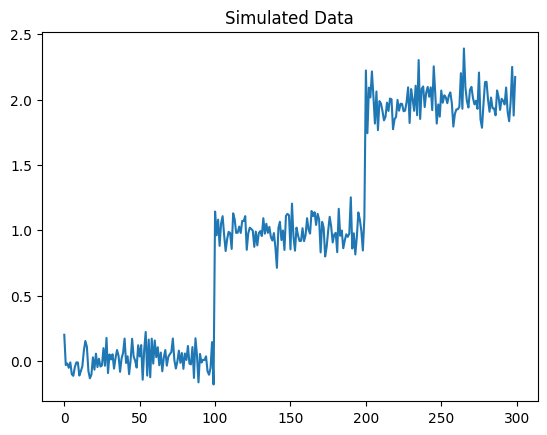

Transition probabilities:
 [[1.00000000e+00 7.04095389e-36 1.16824431e-33]
 [7.94886903e-35 6.24638079e-01 3.75361921e-01]
 [4.62435552e-35 8.87183585e-01 1.12816415e-01]]
State means:
 [[1.98983662]
 [0.50080176]
 [0.50210997]]
State covariances:
 [[[0.01461134]]

 [[0.24798142]]

 [[0.24801316]]]


In [59]:

# Simulate example data
X = np.concatenate([np.random.normal(loc=i, scale=0.1, size=100) for i in range(3)])
X = X.reshape(-1, 1) # HMM requires 2D observations even if only one dimension
# Sequence labels for illustration
lengths = [100] * 3 # Each segment has a length of 100
plt.plot(X)
plt.title("Simulated Data")
plt.show()
# Initialize the Gaussian HMM model
model3 = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=10000)
# Train the model with example data
model3.fit(X, lengths)
# Display learned parameters
print("Transition probabilities:\n", model3.transmat_)
print("State means:\n", model3.means_)
print("State covariances:\n", model3.covars_)



In [60]:
# Predict the sequence of states for a new observation
logprob, hidden_states = model3.decode(X, algorithm="map" or "viterbi" )
print("Predicted hidden states:\n", hidden_states)

Predicted hidden states:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


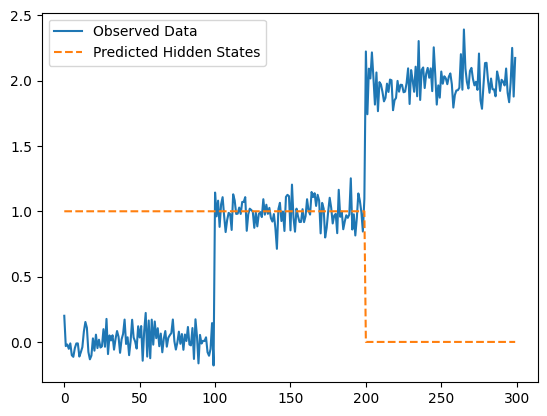

In [61]:

# Visualization of hidden states on simulated data
plt.plot(X, label='Observed Data')
plt.plot(hidden_states, label='Predicted Hidden States', linestyle='--')
plt.legend()
plt.show()